# **Proyecto Final: Aplicación Del Procesamiento De Señales En El Mundo Real**


#### **Librerias y modulos**

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.signal import savgol_filter, find_peaks
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os

#### **Funciones extraer características**

In [2]:
def calculate_fhr_metrics(fhr_values):
    # Media de la frecuencia cardíaca normal (110-160 lpm)
    mean_fhr = np.mean(fhr_values)
    normal_fhr = 1 if mean_fhr >= 110 and mean_fhr <= 160 else 0

    # Contar el número de aceleraciones y desaceleraciones
    diff_fhr_values = np.diff(fhr_values)
    accelerations_fhr = np.sum(diff_fhr_values > 0)
    decelerations_fhr = np.sum(diff_fhr_values < 0)

    # Valor mínimo y máximo global
    min_fhr = np.min(fhr_values)
    max_fhr = np.max(fhr_values)

    # Contar el número de picos
    peaks, _ = find_peaks(fhr_values)
    num_peaks = len(peaks)

    # Desviación estándar
    std_dev_fhr = np.std(fhr_values)

    # iemg
    iemg_fhr = iemg(fhr_values)

    # mav
    mav_fhr = mav(fhr_values)

    # mav1
    mav1_fhr = mav1(fhr_values)

    # mav2
    mav2_fhr = mav2(fhr_values)

    # ssi
    ssi_fhr = ssi(fhr_values)

    # var
    var_fhr = var(fhr_values)

    # rms
    rms_fhr = rms(fhr_values)

    # aac
    aac_fhr = aac(fhr_values)

    # wl
    wl_fhr = wl(fhr_values)

    # dasdv
    dasdv_fhr = dasdv(fhr_values)

    return (
        mean_fhr,
        normal_fhr,
        accelerations_fhr,
        decelerations_fhr,
        min_fhr,
        max_fhr,
        num_peaks,
        std_dev_fhr,
        iemg_fhr,
        mav_fhr,
        mav1_fhr,
        mav2_fhr,
        ssi_fhr,
        var_fhr,
        rms_fhr,
        aac_fhr,
        wl_fhr,
        dasdv_fhr,
    )


def calculate_uc_metrics(uc_values):
    # Media de las contracciones uterinas en el rango normal (30-50 mmHg)
    mean_uc = np.mean(uc_values)
    normal_uc = 1 if mean_uc >= 30 and mean_uc <= 50 else 0

    # Contar el número de aceleraciones y desaceleraciones
    diff_uc_values = np.diff(uc_values)
    accelerations_uc = np.sum(diff_uc_values > 0)
    decelerations_uc = np.sum(diff_uc_values < 0)

    # Valor mínimo y máximo global
    min_uc = np.min(uc_values)
    max_uc = np.max(uc_values)

    # Contar el número de picos
    uc_peaks, _ = find_peaks(uc_values, height=30)
    num_peaks_uc = len(uc_peaks)

    # Desviación estándar de la señal
    std_dev_uc = np.std(uc_values)

    # iemg
    iemg_uc = iemg(uc_values)

    # mav
    mav_uc = mav(uc_values)

    # mav1
    mav1_uc = mav1(uc_values)

    # mav2
    mav2_uc = mav2(uc_values)

    # ssi
    ssi_uc = ssi(uc_values)

    # var
    var_uc = var(uc_values)

    # rms
    rms_uc = rms(uc_values)

    # aac
    aac_uc = aac(uc_values)

    # wl
    wl_uc = wl(uc_values)

    # dasdv
    dasdv_uc = dasdv(uc_values)

    return (
        normal_uc,
        mean_uc,
        accelerations_uc,
        decelerations_uc,
        min_uc,
        max_uc,
        num_peaks_uc,
        std_dev_uc,
        iemg_uc,
        mav_uc,
        mav1_uc,
        mav2_uc,
        ssi_uc,
        var_uc,
        rms_uc,
        aac_uc,
        wl_uc,
        dasdv_uc,
    )


def iemg(signal):
    return np.sum(np.abs(signal))


def mav(signal):
    mav = (1 / len(signal)) * np.sum(np.abs(signal))
    return mav


def mav1(signal):
    N = len(signal)
    indices = np.arange(1, N + 1)
    weights = np.where((0.25 * N <= indices) & (indices <= 0.75 * N), 1, 0.5)
    weighted_sum = np.sum(weights * np.abs(signal))
    mav1 = weighted_sum / N
    return mav1


def mav2(signal):
    N = len(signal)
    indices = np.arange(1, N + 1)
    weights = np.where(
        (0.25 * N <= indices) & (indices <= 0.75 * N),
        1,
        np.where(indices < 0.25 * N, 4 * indices / N, 4 * (indices - N) / N),
    )

    weighted_sum = np.sum(weights * np.abs(signal))
    mav2 = weighted_sum / N
    return mav2


def ssi(signal):
    ssi = np.sum(signal**2)
    return ssi


def var(signal):
    N = len(signal)
    var = np.sum(signal**2) / (N - 1)
    return var


def rms(signal):
    N = len(signal)
    rms = np.sqrt(np.sum(signal**2) / N)
    return rms


def aac(signal):
    N = len(signal)
    aac = np.sum(np.abs(np.diff(signal))) / N
    return aac


def wl(signal):
    wl = np.sum(np.abs(np.diff(signal)))
    return wl


def dasdv(signal):
    N = len(signal)
    differences = np.diff(signal)
    dasdv = np.sqrt(np.sum(differences**2) / (N - 1))
    return dasdv

#### **Funciones crear DataFrame**

In [3]:
def create_signals_dataset(path):
    fs = 4
    cols_data = []
    fhr_features = []
    uc_features = []
    features = []
    index = []

    files = sorted([f for f in os.listdir(path) if f.endswith(".csv")])

    for file in files:
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path, sep=",")

        df["FHR"] = df["FHR"].replace(0, np.nan).interpolate().fillna(0)
        df["UC"] = df["UC"].replace(0, np.nan).interpolate().fillna(0)

        FHR_col = savgol_filter(df["FHR"].values, 200, 3)
        UC_col = savgol_filter(df["UC"].values, 200, 3)
        s_col = np.arange(len(df["seconds"].values)) / fs

        cols_data.append([s_col, FHR_col, UC_col])
        index.append(file.replace(".csv", ""))
        (
            mean_fhr,
            normal_fhr,
            accelerations_fhr,
            decelerations_fhr,
            min_fhr,
            max_fhr,
            num_peaks,
            std_dev_fhr,
            iemg_fhr,
            mav_fhr,
            mav1_fhr,
            mav2_fhr,
            ssi_fhr,
            var_fhr,
            rms_fhr,
            aac_fhr,
            wl_fhr,
            dasdv_fhr,
        ) = calculate_fhr_metrics(FHR_col)

        fhr_features.append(
            [
                mean_fhr,
                normal_fhr,
                accelerations_fhr,
                decelerations_fhr,
                min_fhr,
                max_fhr,
                num_peaks,
                std_dev_fhr,
                iemg_fhr,
                mav_fhr,
                mav1_fhr,
                mav2_fhr,
                ssi_fhr,
                var_fhr,
                rms_fhr,
                aac_fhr,
                wl_fhr,
                dasdv_fhr,
            ]
        )

        (
            normal_uc,
            mean_uc,
            accelerations_uc,
            decelerations_uc,
            min_uc,
            max_uc,
            num_peaks_uc,
            std_dev_uc,
            iemg_uc,
            mav_uc,
            mav1_uc,
            mav2_uc,
            ssi_uc,
            var_uc,
            rms_uc,
            aac_uc,
            wl_uc,
            dasdv_uc,
        ) = calculate_uc_metrics(UC_col)

        uc_features.append(
            [
                normal_uc,
                mean_uc,
                accelerations_uc,
                decelerations_uc,
                min_uc,
                max_uc,
                num_peaks_uc,
                std_dev_uc,
                iemg_uc,
                mav_uc,
                mav1_uc,
                mav2_uc,
                ssi_uc,
                var_uc,
                rms_uc,
                aac_uc,
                wl_uc,
                dasdv_uc,
            ]
        )
    SIGNALS_DF = pd.DataFrame(cols_data, columns=df.columns.values, index=index)

    FEATURES_FHR_DF = pd.DataFrame(
        fhr_features,
        columns=[
            "mean_fhr",
            "normal_fhr",
            "accelerations_fhr",
            "decelerations_fhr",
            "min_fhr",
            "max_fhr",
            "num_peaks_fhr",
            "std_dev_fhr",
            "iemg_fhr",
            "mav_fhr",
            "mav1_fhr",
            "mav2_fhr",
            "ssi_fhr",
            "var_fhr",
            "rms_fhr",
            "aac_fhr",
            "wl_fhr",
            "dasdv_fhr",
        ],
        index=index,
    )

    FEATURES_UC_DF = pd.DataFrame(
        uc_features,
        columns=[
            "normal_uc",
            "mean_uc",
            "accelerations_uc",
            "decelerations_uc",
            "min_uc",
            "max_uc",
            "num_peaks_uc",
            "std_dev_uc",
            "iemg_uc",
            "mav_uc",
            "mav1_uc",
            "mav2_uc",
            "ssi_uc",
            "var_uc",
            "rms_uc",
            "aac_uc",
            "wl_uc",
            "dasdv_uc",
        ],
        index=index,
    )

    FEATURES = pd.concat([FEATURES_FHR_DF, FEATURES_UC_DF], axis=1)

    return SIGNALS_DF, FEATURES

#### **Lectura del conjunto de datos de entrenamiento y de prueba**

In [5]:
TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/DSP_NN/data/signals/train"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/DSP_NN/data/signals/test"

train_signals_df, train_features_df = create_signals_dataset(TRAIN_PATH)
test_signals_df, test_features_df = create_signals_dataset(TEST_PATH)

#### **Visualización del conjunto de prueba**

In [6]:
train_signals_df.head()

,seconds,FHR,UC
5002,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[125.79954772909103, 126.1512853674876, 126.49...","[6.975518082173635, 6.971212586285128, 6.96665..."
5003,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[116.95482727197071, 117.07175038901416, 117.1...","[25.785611665129455, 25.775700212153648, 25.76..."
5005,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[151.67827425691624, 152.0507333769893, 152.41...","[42.402698796899784, 42.566633444941644, 42.72..."
5006,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[130.35000820411426, 130.5571024449305, 130.76...","[15.897514917729557, 15.781976577751768, 15.66..."
5007,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
test_signals_df.head()

,seconds,FHR,UC
5001,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[152.01467823056106, 151.84534402366543, 151.6...","[2.0223411790484143, 1.83961821510542, 1.66311..."
5004,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[132.49743111006933, 132.54606620649471, 132.5...","[128.45508741713084, 128.24163370805, 128.0285..."
5010,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5012,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5020,"[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...","[146.05796219251363, 146.13748425567616, 146.2...","[26.45142196154769, 26.339823506902007, 26.230..."


#### **Gráfica de los datos**

<Figure size 1500x500 with 0 Axes>

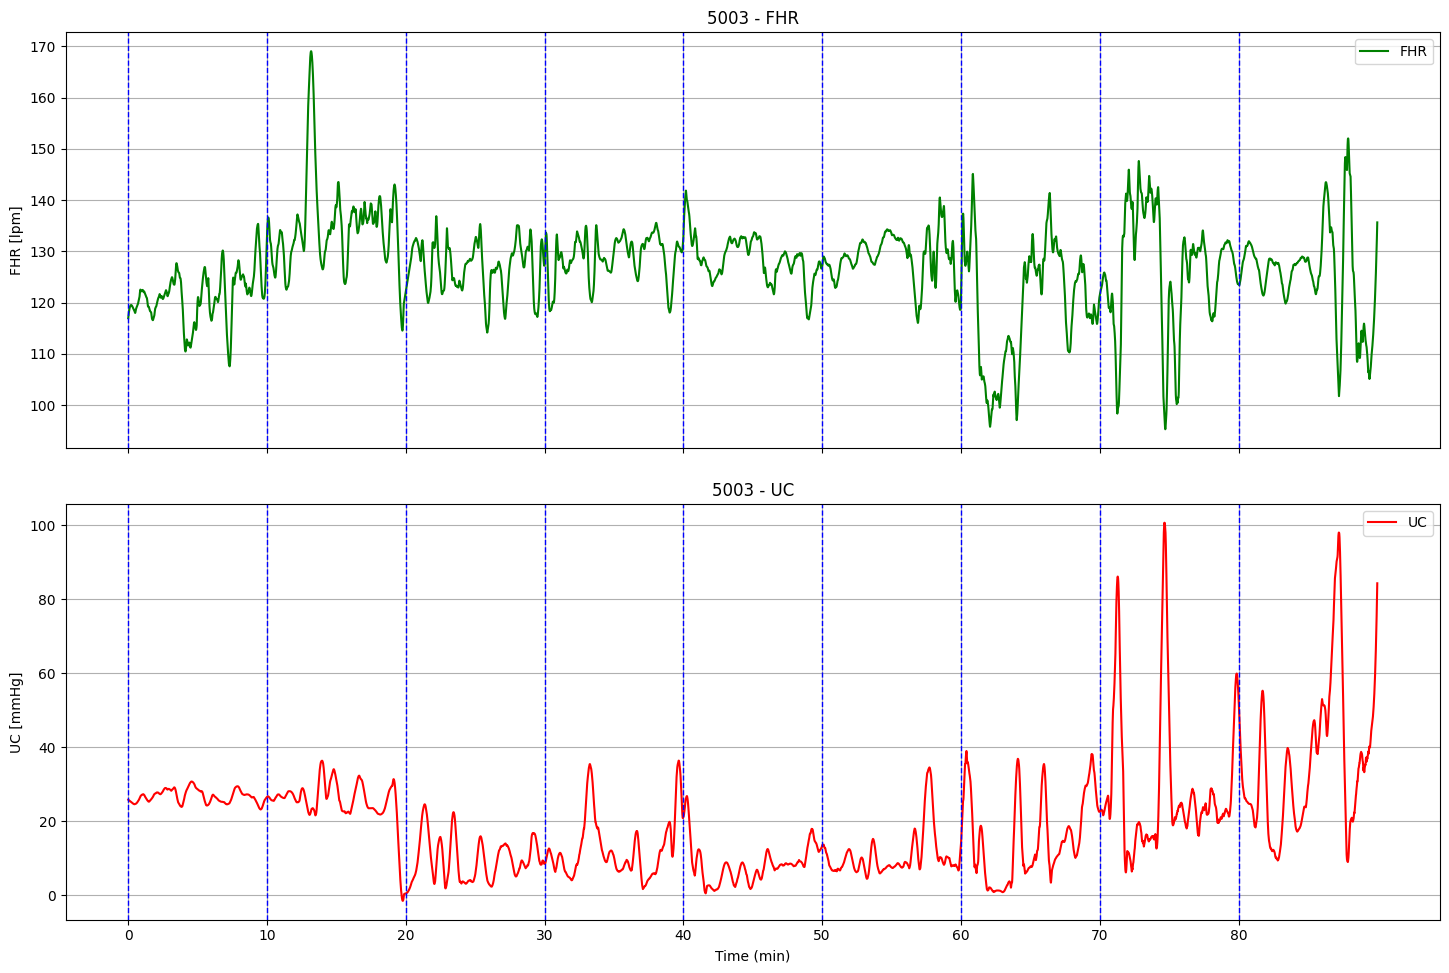

In [8]:
file = "5003"
seconds = train_signals_df.loc[file]["seconds"]
FHR = train_signals_df.loc[file]["FHR"]
UC = train_signals_df.loc[file]["UC"]

# Convertir segundos a minutos
minutes = seconds / 60

# Crear la figura
plt.figure(figsize=(15, 5))

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.tight_layout(pad=3.0)

# Graficar FHR en el primer subplot
axs[0].plot(minutes, FHR, label="FHR", color="g")
for minute in range(0, int(max(minutes)), 10):
    axs[0].axvline(x=minute, color="b", linestyle="--", linewidth=1)
axs[0].set_title(f"{file} - FHR")
axs[0].set_ylabel("FHR [lpm]")
axs[0].set_xticks(range(0, int(max(minutes)), 10))
axs[0].legend()
axs[0].grid()

# Graficar UC en el segundo subplot
axs[1].plot(minutes, UC, label="UC", color="r")
for minute in range(0, int(max(minutes)), 10):
    axs[1].axvline(x=minute, color="b", linestyle="--", linewidth=1)
axs[1].set_title(f"{file} - UC")
axs[1].set_xlabel("Time (min)")
axs[1].set_ylabel("UC [mmHg]")
axs[1].set_xticks(range(0, int(max(minutes)), 10))
axs[1].legend()
axs[1].grid()

# Mostrar la figura
plt.show()

#### **Lectura de los metadatos**

In [9]:
train_features_dataset = (
    pd.read_csv(
        "/content/drive/MyDrive/Colab Notebooks/DSP_NN/data/train1.csv", sep=";"
    )
    .sort_values("recordID")
    .drop("recordID", axis=1)
)
test_features_dataset = (
    pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSP_NN/data/test1.csv", sep=";")
    .sort_values("recordID")
    .drop("recordID", axis=1)
)

#### **Creación del conjunto de datos de entrenamiento y de prueba a partir de los metadatos**

In [10]:
metadata_train = pd.concat(
    [
        train_features_dataset.reset_index(drop=True),
        train_features_df.reset_index(drop=True),
    ],
    axis=1,
)
metada_test = pd.concat(
    [
        test_features_dataset.reset_index(drop=True),
        test_features_df.reset_index(drop=True),
    ],
    axis=1,
)

In [11]:
metadata_train

,babyhealth,gestweeks,sex,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,...,iemg_uc,mav_uc,mav1_uc,mav2_uc,ssi_uc,var_uc,rms_uc,aac_uc,wl_uc,dasdv_uc
0,0,41.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,...,348247.269318,20.729004,15.165085,7.315741,1.091103e+07,649.504763,25.484625,0.079010,1327.372273,0.133318
1,0,40.0,2.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,...,417001.894801,19.305643,12.341050,4.609860,1.265982e+07,586.129825,24.209558,0.099026,2138.961528,0.170266
2,0,41.0,1.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,...,436808.339312,26.000496,17.101907,9.175489,2.383377e+07,1418.761449,37.665329,0.191442,3216.233412,0.316036
3,0,38.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,0.0,...,209074.870114,12.444933,10.285993,8.149745,3.921877e+06,233.458979,15.278910,0.054327,912.698912,0.085728
4,0,39.0,1.0,34.0,3.0,1.0,1.0,0.0,0.0,0.0,...,239753.624480,15.349144,10.873513,5.339201,7.746976e+06,495.996915,22.270275,0.143801,2246.178295,0.217288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,38.0,1.0,33.0,2.0,0.0,0.0,0.0,0.0,0.0,...,504811.383130,23.370897,18.920406,16.808544,2.045050e+07,946.826294,30.769830,0.145428,3141.240469,0.231426
382,0,38.0,1.0,36.0,5.0,3.0,1.0,1.0,0.0,0.0,...,285399.873870,16.988088,12.860994,10.642008,6.893935e+06,410.377730,20.257179,0.074592,1253.141455,0.152598
383,0,40.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,...,429006.649924,22.344096,18.801637,18.400068,1.446781e+07,753.571089,27.450534,0.059112,1134.945904,0.109558
384,0,41.0,1.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,...,232740.227179,12.638622,11.055261,8.775668,7.000911e+06,380.194995,19.498060,0.053366,982.741346,0.129728


In [12]:
metada_test

,gestweeks,sex,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,meconium,...,iemg_uc,mav_uc,mav1_uc,mav2_uc,ssi_uc,var_uc,rms_uc,aac_uc,wl_uc,dasdv_uc
0,42.0,2.0,34.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,...,307493.930133,17.082996,12.012486,6.609123,9.643606e+06,535.785630,23.146401,0.141944,2554.996922,0.215722
1,39.0,1.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,404265.708442,24.063435,17.290645,12.707389,1.992899e+07,1186.319784,34.441968,0.119078,2000.515184,0.232858
2,41.0,2.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,257715.127996,14.317507,11.991024,9.547890,6.233511e+06,346.325396,18.609303,0.070004,1260.068445,0.118512
3,41.0,1.0,33.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,630612.644627,29.195030,22.962362,15.253063,2.738954e+07,1268.093081,35.609470,0.202030,4363.842153,0.298840
4,42.0,2.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,332086.701738,19.767066,16.126606,15.028626,9.037013e+06,537.949466,23.193047,0.081457,1368.476868,0.116395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,41.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,375564.144934,21.164505,15.683390,9.379371,1.375446e+07,775.161185,27.840932,0.096592,1714.032109,0.155915
162,42.0,1.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,289232.377962,18.540537,14.163869,7.938765,7.859558e+06,503.850099,22.445886,0.058223,908.273339,0.099273
163,40.0,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,332827.962872,17.334790,12.136565,5.121515,1.584337e+07,825.218439,28.725867,0.141002,2707.235143,0.279745
164,40.0,2.0,29.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,415217.092654,26.616480,19.395317,9.058379,1.463639e+07,938.290132,30.630540,0.033934,529.365086,0.075085


#### **Datos estadisticos de los metadatos**

In [13]:
metadata_train.describe()

,babyhealth,gestweeks,sex,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,...,iemg_uc,mav_uc,mav1_uc,mav2_uc,ssi_uc,var_uc,rms_uc,aac_uc,wl_uc,dasdv_uc
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,3.860000e+02,386.000000,386.000000,386.000000,3.860000e+02,386.000000,386.000000,3.860000e+02,3.860000e+02,3.860000e+02
mean,0.194301,39.927461,1.448187,29.707254,1.453368,0.417098,0.072539,0.080311,0.025907,0.012953,...,3.721507e+05,20.740555,15.958235,11.579615,1.572362e+07,872.326491,27.197945,9.980723e-02,1.786326e+03,1.671128e-01
std,0.396175,1.182084,0.497954,4.608834,1.026481,0.785993,0.259715,0.272127,0.159063,0.113220,...,1.856215e+05,9.933460,7.713032,6.305136,1.397004e+07,758.585233,11.527952,5.888373e-02,1.079963e+03,8.481222e-02
min,0.000000,37.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.988454e+03,0.447978,0.349005,-0.594940,3.772312e+03,0.241830,0.491747,3.224405e-16,5.417000e-12,2.952881e-14
25%,0.000000,39.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.456869e+05,13.988915,10.885375,7.040881,6.627456e+06,379.018127,19.467775,5.685949e-02,1.030753e+03,1.057978e-01
50%,0.000000,40.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.378193e+05,19.250762,14.887169,10.915112,1.199985e+07,662.068561,25.730038,8.966776e-02,1.624726e+03,1.575710e-01
75%,0.000000,41.000000,2.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.606419e+05,26.278880,20.511728,14.992588,2.053000e+07,1169.450143,34.195693,1.285580e-01,2.338945e+03,2.173196e-01
max,1.000000,43.000000,2.000000,42.000000,8.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,1.347290e+06,80.195846,60.476866,39.719383,1.136914e+08,6767.750207,82.263889,3.677536e-01,6.178260e+03,4.685193e-01


#### **Eliminación de características innesearias conjunto de datos de entrenamiento**

In [14]:
y_train = metadata_train["babyhealth"].reset_index(drop=True)
features_train = metadata_train.drop(
    columns=["babyhealth", "sex", "rectype"]
).reset_index(drop=True)
x_train = features_train.fillna(1)

#### **Histograma**

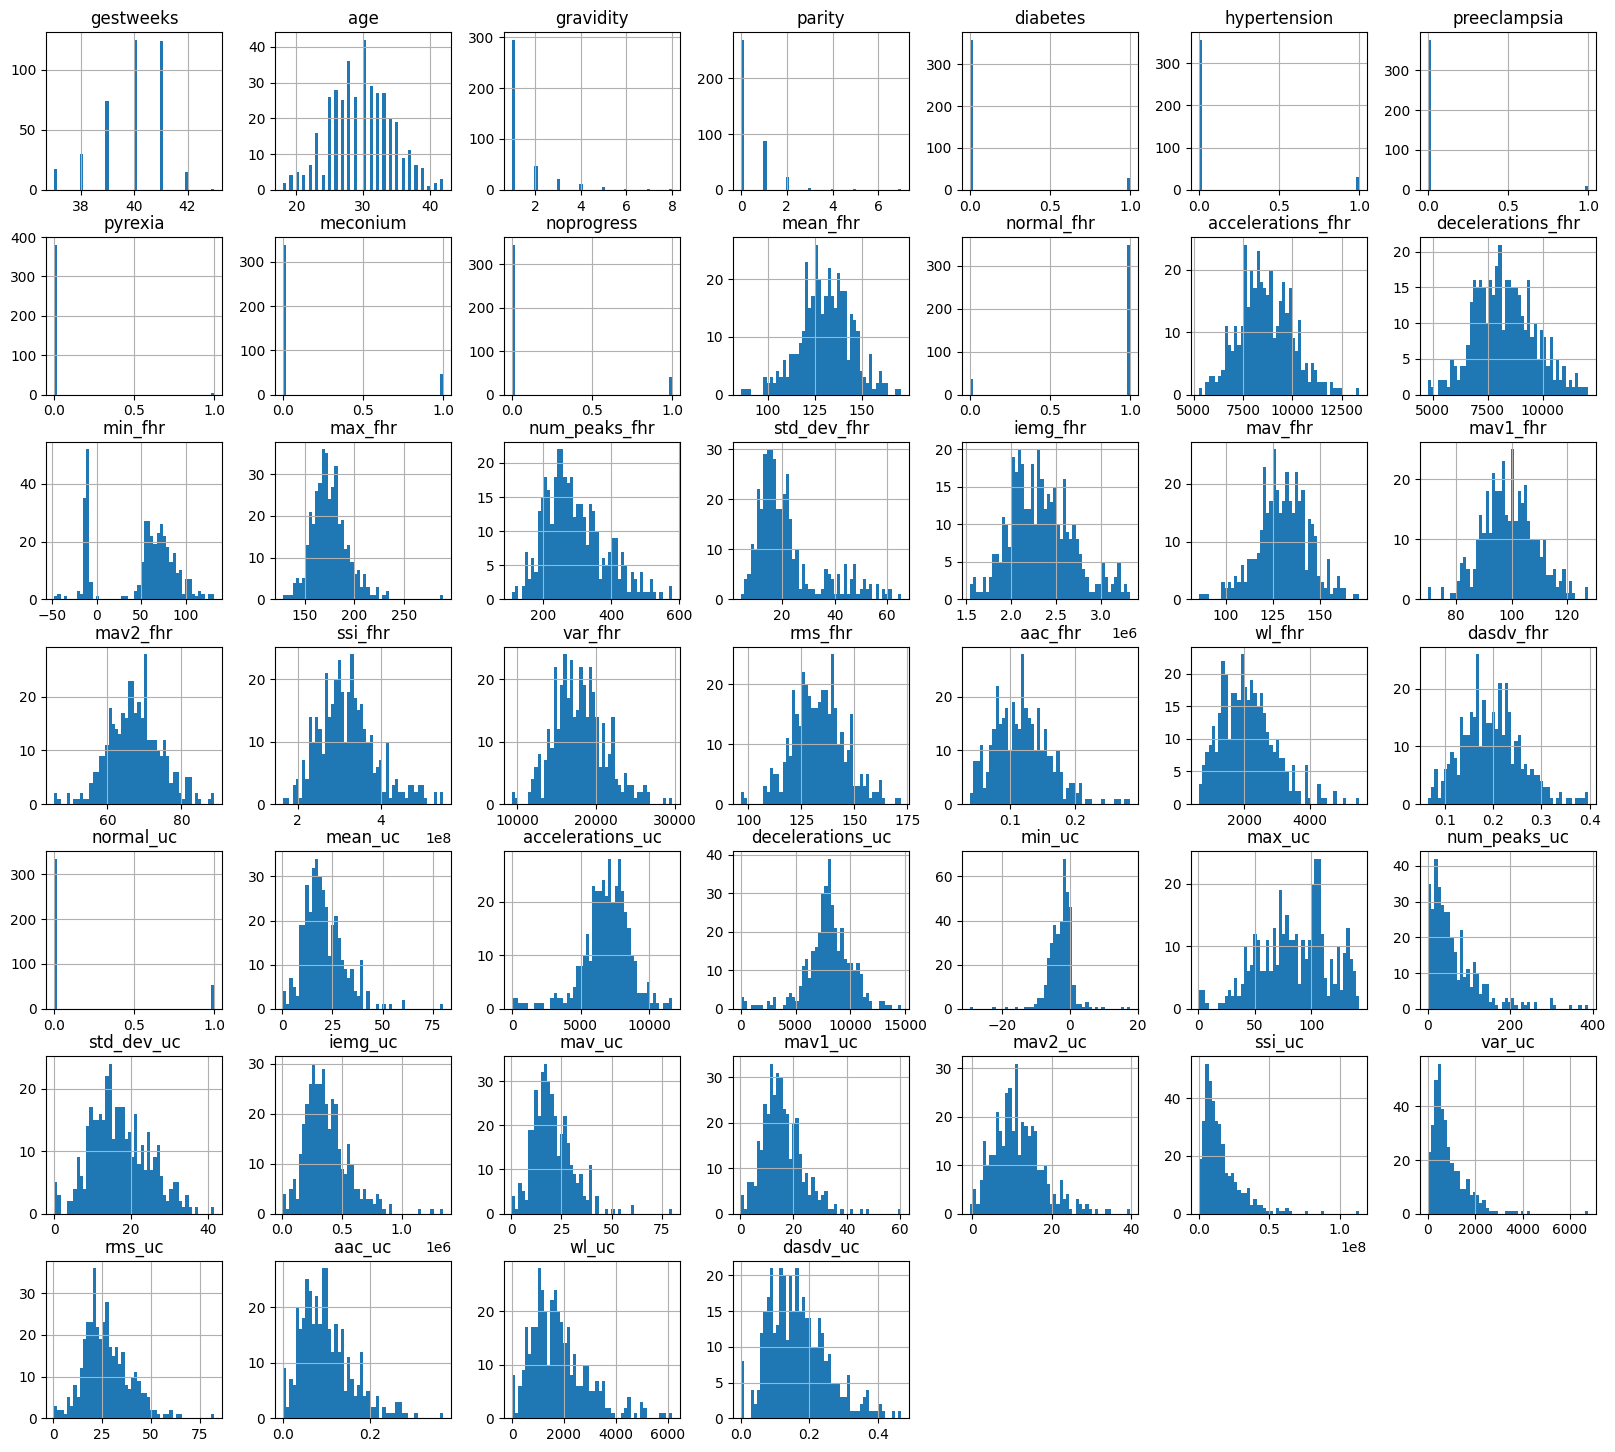

In [15]:
features_train.hist(figsize=(20, 18), bins=50)
plt.show()

#### **Matriz de correlación**

In [16]:
corr_matrix = metadata_train.corr()
corr_matrix["babyhealth"].sort_values(ascending=False)

babyhealth           1.000000
wl_fhr               0.215708
aac_fhr              0.172801
dasdv_fhr            0.161809
iemg_fhr             0.122464
decelerations_fhr    0.104157
ssi_fhr              0.103889
std_dev_fhr          0.103292
noprogress           0.090833
max_fhr              0.072544
accelerations_uc     0.045235
max_uc               0.031482
mav2_fhr             0.028069
hypertension         0.023531
accelerations_fhr    0.016208
var_fhr              0.013959
gestweeks            0.013535
num_peaks_uc         0.012815
iemg_uc              0.006312
rms_fhr              0.006114
mav1_fhr            -0.000506
min_uc              -0.001831
mav2_uc             -0.004532
age                 -0.007175
mean_fhr            -0.010203
mav_fhr             -0.010272
std_dev_uc          -0.011823
wl_uc               -0.017846
normal_fhr          -0.018035
mav1_uc             -0.018390
decelerations_uc    -0.020292
sex                 -0.021250
rms_uc              -0.021277
mav_uc    

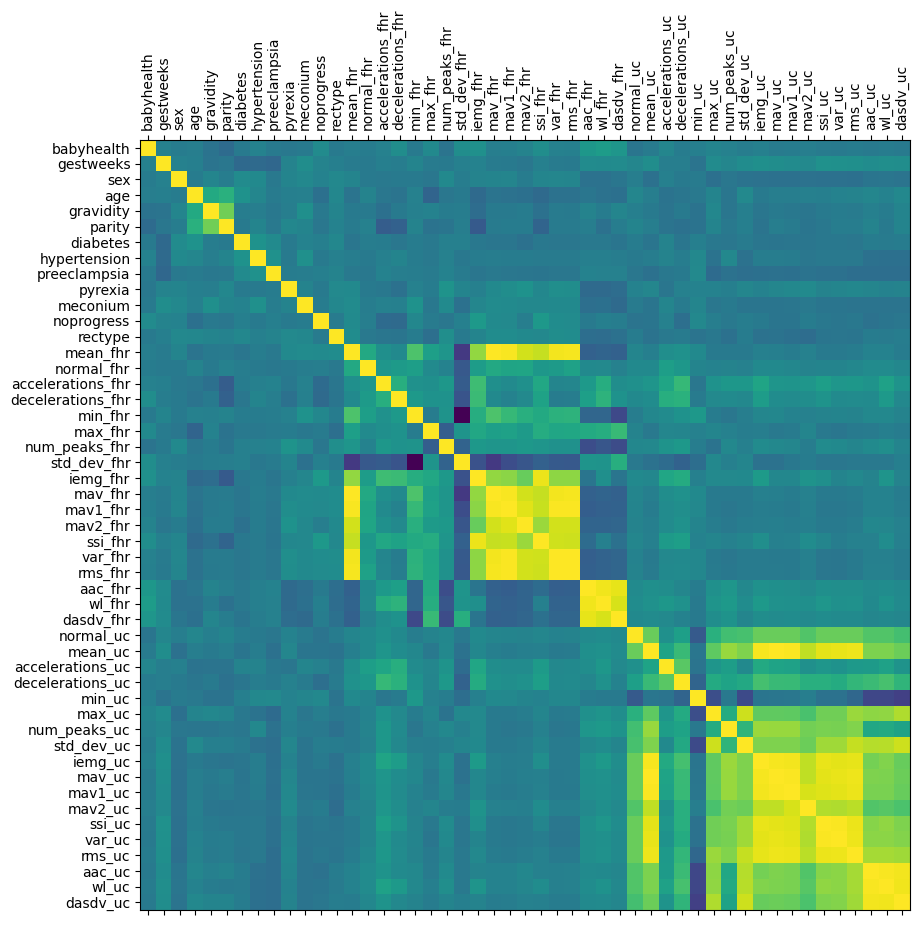

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

#### **Etiqueta de salida y características de entrenamiento**

In [18]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
381    0
382    0
383    0
384    0
385    0
Name: babyhealth, Length: 386, dtype: int64

In [19]:
x_train.head()

,gestweeks,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,meconium,noprogress,...,iemg_uc,mav_uc,mav1_uc,mav2_uc,ssi_uc,var_uc,rms_uc,aac_uc,wl_uc,dasdv_uc
0,41.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,348247.269318,20.729004,15.165085,7.315741,1.091103e+07,649.504763,25.484625,0.079010,1327.372273,0.133318
1,40.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,417001.894801,19.305643,12.341050,4.609860,1.265982e+07,586.129825,24.209558,0.099026,2138.961528,0.170266
2,41.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,436808.339312,26.000496,17.101907,9.175489,2.383377e+07,1418.761449,37.665329,0.191442,3216.233412,0.316036
3,38.0,28.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,209074.870114,12.444933,10.285993,8.149745,3.921877e+06,233.458979,15.278910,0.054327,912.698912,0.085728
4,39.0,34.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,239753.624480,15.349144,10.873513,5.339201,7.746976e+06,495.996915,22.270275,0.143801,2246.178295,0.217288


#### **Eliminación de características innesearias conjunto de datos de prueba**

In [20]:
features_test = metada_test.drop(columns=["sex", "rectype"]).reset_index(drop=True)
x_test = features_test.fillna(1)

#### **Visualización de los datos de prueba**

In [21]:
x_test.head()

,gestweeks,age,gravidity,parity,diabetes,hypertension,preeclampsia,pyrexia,meconium,noprogress,...,iemg_uc,mav_uc,mav1_uc,mav2_uc,ssi_uc,var_uc,rms_uc,aac_uc,wl_uc,dasdv_uc
0,42.0,34.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,307493.930133,17.082996,12.012486,6.609123,9.643606e+06,535.785630,23.146401,0.141944,2554.996922,0.215722
1,39.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,404265.708442,24.063435,17.290645,12.707389,1.992899e+07,1186.319784,34.441968,0.119078,2000.515184,0.232858
2,41.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,257715.127996,14.317507,11.991024,9.547890,6.233511e+06,346.325396,18.609303,0.070004,1260.068445,0.118512
3,41.0,33.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,630612.644627,29.195030,22.962362,15.253063,2.738954e+07,1268.093081,35.609470,0.202030,4363.842153,0.298840
4,42.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,332086.701738,19.767066,16.126606,15.028626,9.037013e+06,537.949466,23.193047,0.081457,1368.476868,0.116395


#### **Reescalado de los datos**

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled

array([[ 0.90850663, -0.15365531, -0.44224504, ..., -0.35364555,
        -0.42552299, -0.3989814 ],
       [ 0.06144489, -0.80542399, -0.44224504, ..., -0.01328467,
         0.32694937,  0.03723188],
       [ 0.90850663,  1.36713827, -0.44224504, ...,  1.55822592,
         1.3257518 ,  1.75820191],
       ...,
       [ 0.06144489,  0.71536959, -0.44224504, ..., -0.69201258,
        -0.60393285, -0.67949348],
       [ 0.90850663,  1.36713827, -0.44224504, ..., -0.78971141,
        -0.74505069, -0.44136379],
       [ 0.06144489,  0.93262582,  1.50868736, ...,  0.17558764,
         0.14176036,  0.50429642]])

In [24]:
x_test_scaled

array([[ 1.75556836,  0.93262582,  0.53322116, ...,  0.71652602,
         0.71268037,  0.5738887 ],
       [-0.78561684, -1.23993644, -0.44224504, ...,  0.32769767,
         0.19858758,  0.77618902],
       [ 0.90850663, -1.02268022, -0.44224504, ..., -0.5067972 ,
        -0.48792435, -0.57377863],
       ...,
       [ 0.06144489,  0.49811337, -0.44224504, ...,  0.7005001 ,
         0.85382942,  1.32974292],
       [ 0.06144489, -0.15365531,  0.53322116, ..., -1.12015771,
        -1.16540262, -1.0864823 ],
       [-0.78561684, -1.23993644, -0.44224504, ...,  0.53696659,
         0.4087938 ,  0.28141669]])

#### **Forma de los datos**

In [25]:
print(x_test_scaled.shape, x_train_scaled.shape, y_train.shape)

(166, 46) (386, 46) (386,)


#### **Verificación de presencia de datos NaN**

In [26]:
print(x_train.isna().sum())

gestweeks            0
age                  0
gravidity            0
parity               0
diabetes             0
hypertension         0
preeclampsia         0
pyrexia              0
meconium             0
noprogress           0
mean_fhr             0
normal_fhr           0
accelerations_fhr    0
decelerations_fhr    0
min_fhr              0
max_fhr              0
num_peaks_fhr        0
std_dev_fhr          0
iemg_fhr             0
mav_fhr              0
mav1_fhr             0
mav2_fhr             0
ssi_fhr              0
var_fhr              0
rms_fhr              0
aac_fhr              0
wl_fhr               0
dasdv_fhr            0
normal_uc            0
mean_uc              0
accelerations_uc     0
decelerations_uc     0
min_uc               0
max_uc               0
num_peaks_uc         0
std_dev_uc           0
iemg_uc              0
mav_uc               0
mav1_uc              0
mav2_uc              0
ssi_uc               0
var_uc               0
rms_uc               0
aac_uc     

In [27]:
print(x_test.isna().sum())

gestweeks            0
age                  0
gravidity            0
parity               0
diabetes             0
hypertension         0
preeclampsia         0
pyrexia              0
meconium             0
noprogress           0
mean_fhr             0
normal_fhr           0
accelerations_fhr    0
decelerations_fhr    0
min_fhr              0
max_fhr              0
num_peaks_fhr        0
std_dev_fhr          0
iemg_fhr             0
mav_fhr              0
mav1_fhr             0
mav2_fhr             0
ssi_fhr              0
var_fhr              0
rms_fhr              0
aac_fhr              0
wl_fhr               0
dasdv_fhr            0
normal_uc            0
mean_uc              0
accelerations_uc     0
decelerations_uc     0
min_uc               0
max_uc               0
num_peaks_uc         0
std_dev_uc           0
iemg_uc              0
mav_uc               0
mav1_uc              0
mav2_uc              0
ssi_uc               0
var_uc               0
rms_uc               0
aac_uc     

#### **División de los datos en entrenamiento y validación a partir del conjunto de datos de entrenamiento**

In [28]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    x_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

#### **Modelos de clasificiacion ML**

Logistic Regression Accuracy: 0.7949
Split test Predictions:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        63
           1       0.43      0.20      0.27        15

    accuracy                           0.79        78
   macro avg       0.63      0.57      0.58        78
weighted avg       0.75      0.79      0.76        78

Full test Predictions:
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


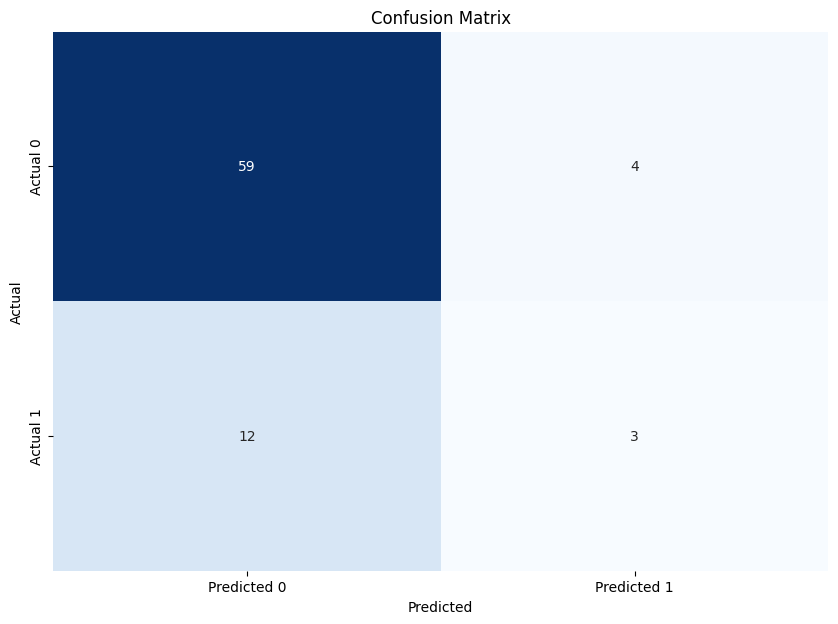

Random Forest Accuracy: 0.7692
Split test Predictions:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        63
           1       0.29      0.13      0.18        15

    accuracy                           0.77        78
   macro avg       0.55      0.53      0.52        78
weighted avg       0.71      0.77      0.73        78

Full test Predictions:
 [0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


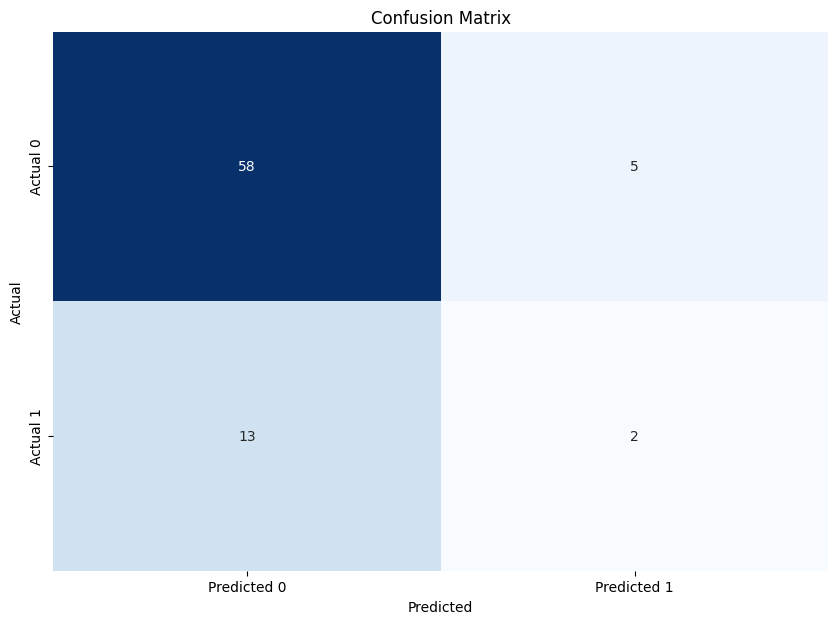

SVM Accuracy: 0.7949
Split test Predictions:
 [0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.45      0.33      0.38        15

    accuracy                           0.79        78
   macro avg       0.65      0.62      0.63        78
weighted avg       0.77      0.79      0.78        78

Full test Predictions:
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


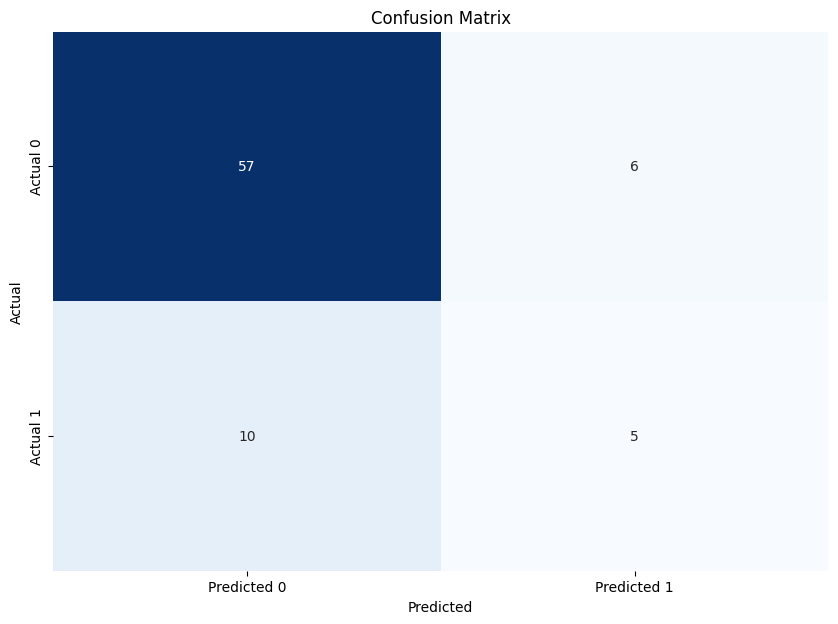

In [29]:
pipelines = {
    "Logistic Regression": Pipeline(
        [("classifier", LogisticRegression(max_iter=1000, C=5))]
    ),
    "Random Forest": Pipeline(
        [
            (
                "classifier",
                RandomForestClassifier(
                    n_estimators=50,
                    max_depth=5,
                    min_samples_split=5,
                    min_samples_leaf=2,
                    n_jobs=-1,
                    class_weight="balanced",
                ),
            )
        ]
    ),
    "SVM": Pipeline(
        [("classifier", SVC(C=10, kernel="poly", class_weight="balanced"))]
    ),
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train_split, y_train_split)

    y_pred_split = pipeline.predict(X_test_split)
    y_pred_scaled = pipeline.predict(x_test_scaled)

    accuracy = accuracy_score(y_test_split, y_pred_split)
    conf_matrix = confusion_matrix(y_test_split, y_pred_split)
    class_report = classification_report(y_test_split, y_pred_split)

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Split test Predictions:\n", y_pred_split)
    print("Classification Report:\n", class_report)
    print("Full test Predictions:\n", y_pred_scaled)

    plt.figure(figsize=(10, 7))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Predicted 0", "Predicted 1"],
        yticklabels=["Actual 0", "Actual 1"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

#### **Red Neuronal Artificial**

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.summary()
# Compilar el modelo
model.compile(
    loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3008      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                       

#### **Entrenamiento del modelo**

In [31]:
history = model.fit(
    X_train_split,
    y_train_split,
    epochs=50,
    validation_data=(X_test_split, y_test_split),
    batch_size=8,
)

Epoch 1/50
39/39 [==============================] - 3s 11ms/step - loss: 0.7989 - accuracy: 0.6071 - val_loss: 0.6009 - val_accuracy: 0.7051
Epoch 2/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7240 - val_loss: 0.4962 - val_accuracy: 0.8077
Epoch 3/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.7890 - val_loss: 0.4812 - val_accuracy: 0.8077
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7987 - val_loss: 0.4878 - val_accuracy: 0.8077
Epoch 5/50
39/39 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.8052 - val_loss: 0.4923 - val_accuracy: 0.8077
Epoch 6/50
39/39 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.8117 - val_loss: 0.4897 - val_accuracy: 0.8077
Epoch 7/50
39/39 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.8019 - val_loss: 0.4871 - val_accuracy: 0.8077
Epoch 8/50
39/39 [=

#### **Evaluación del modelo**

In [32]:
eval = model.evaluate(X_test_split, y_test_split)
predictions = model.predict(x_test_scaled)

6/6 [==============================] - 0s 5ms/step


#### **Predicciones**

In [33]:
predicted_labels = (predictions > 0.5).astype(int)

print(predicted_labels.flatten())

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### **Visualización del entrenamiento**

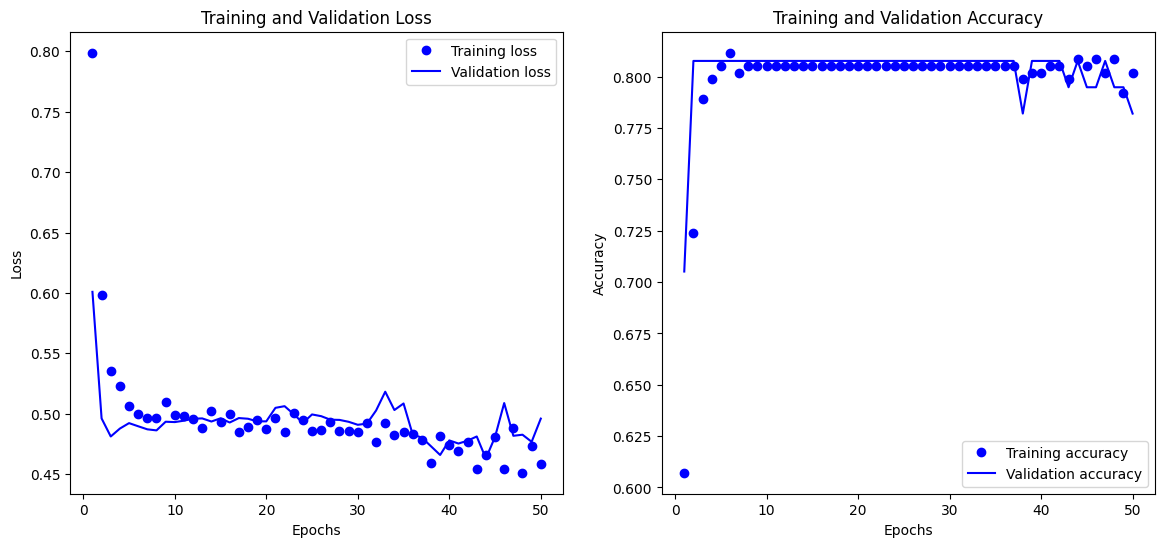

In [34]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

# Graficar pérdida (loss)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Graficar precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [1]:
!jupyter nbconvert --to latex "./test2NN.ipynb"

[NbConvertApp] Converting notebook ./test2NN.ipynb to latex
/home/xmunder/universidad/DSP/.venv/lib/python3.10/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (2.9.2.1).
Your version must be at least (2.14.2) but less than (4.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
[NbConvertApp] Support files will be in test2NN_files/
[NbConvertApp] Writing 119279 bytes to test2NN.tex
